# ASL DATA EDA

In [38]:
import os
from collections import Counter
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np
import random

## Number of images in each set

In [26]:
dirs = {'Training images': '../data/train/images/',
        'Test Images' : '../data/test/images/',
        'Validation Images' : '../data/valid/images/'}

In [29]:
for d in dirs.keys():
    print(d+':', len(os.listdir(dirs[d])))

Training images: 1512
Test Images: 72
Validation Images: 144


## Frequency of each Letter

In [32]:
freq = {}
for d in dirs:
    files = os.listdir(dirs[d])
    letters = [file[0] for file in files]
    freq[d] = (dict(Counter(letters)))

#freq

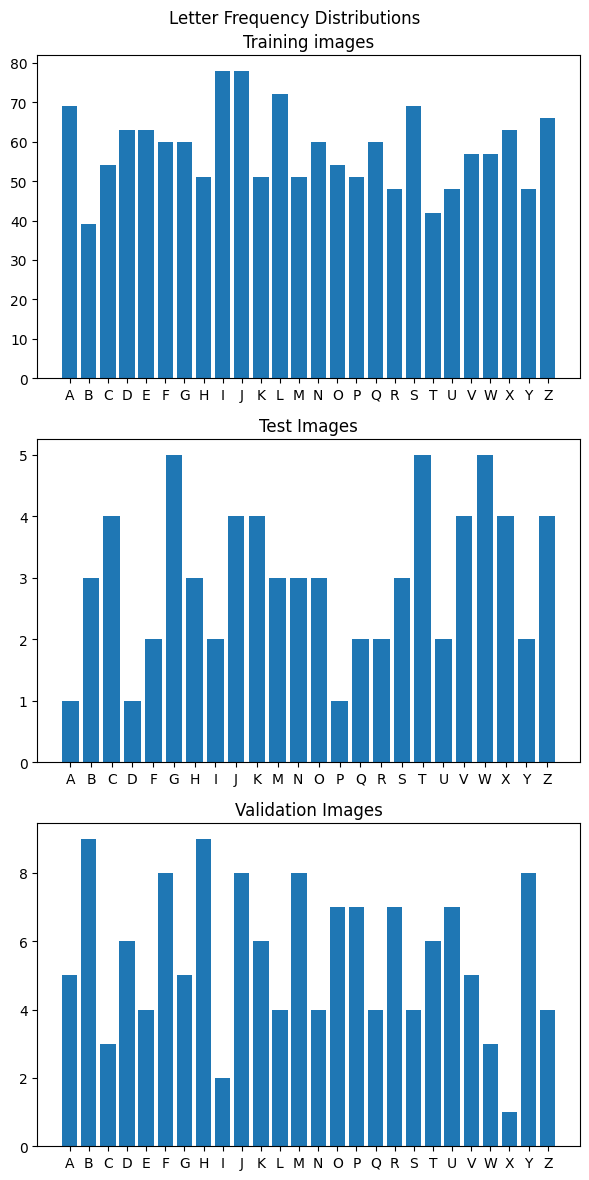

In [31]:
# Create a subplot with 3 rows and 1 column
fig, axs = plt.subplots(3, 1, figsize=(6, 12))

# Iterate over the directories and their corresponding letter frequencies
for i, (directory, freqs) in enumerate(freq.items()):
    # Get the letters and frequencies
    letters = list(freqs.keys())
    frequencies = list(freqs.values())

    # Plot the distribution in the corresponding subplot
    ax = axs[i]
    ax.bar(letters, frequencies)
    ax.set_title(directory)

# Set the overall title for the subplot
fig.suptitle('Letter Frequency Distributions')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the plot
plt.show()

## Image size statistics

In [37]:
for d in dirs:
    # Initialize variables
    sizes = []

    # Iterate over the image files in the directory
    for filename in os.listdir(dirs[d]):
        # Open the image using PIL
        image = Image.open(os.path.join(dirs[d], filename))
        
        # Get the image size (width, height)
        sizes.append(image.size)

    # Calculate min, max, mean, and median image sizes
    min_size = np.min(sizes, axis=0)
    max_size = np.max(sizes, axis=0)
    mean_size = np.mean(sizes, axis=0)
    median_size = np.median(sizes, axis=0)

    # Print the results
    print(d)
    print("Minimum Image Size:", min_size)
    print("Maximum Image Size:", max_size)
    print("Mean Image Size:", mean_size)
    print("Median Image Size:", median_size)
    print()


Training images
Minimum Image Size: [372 372]
Maximum Image Size: [416 416]
Mean Image Size: [393.27777778 393.27777778]
Median Image Size: [394. 394.]

Test Images
Minimum Image Size: [416 416]
Maximum Image Size: [416 416]
Mean Image Size: [416. 416.]
Median Image Size: [416. 416.]

Validation Images
Minimum Image Size: [416 416]
Maximum Image Size: [416 416]
Mean Image Size: [416. 416.]
Median Image Size: [416. 416.]



## Image Intensity Plots

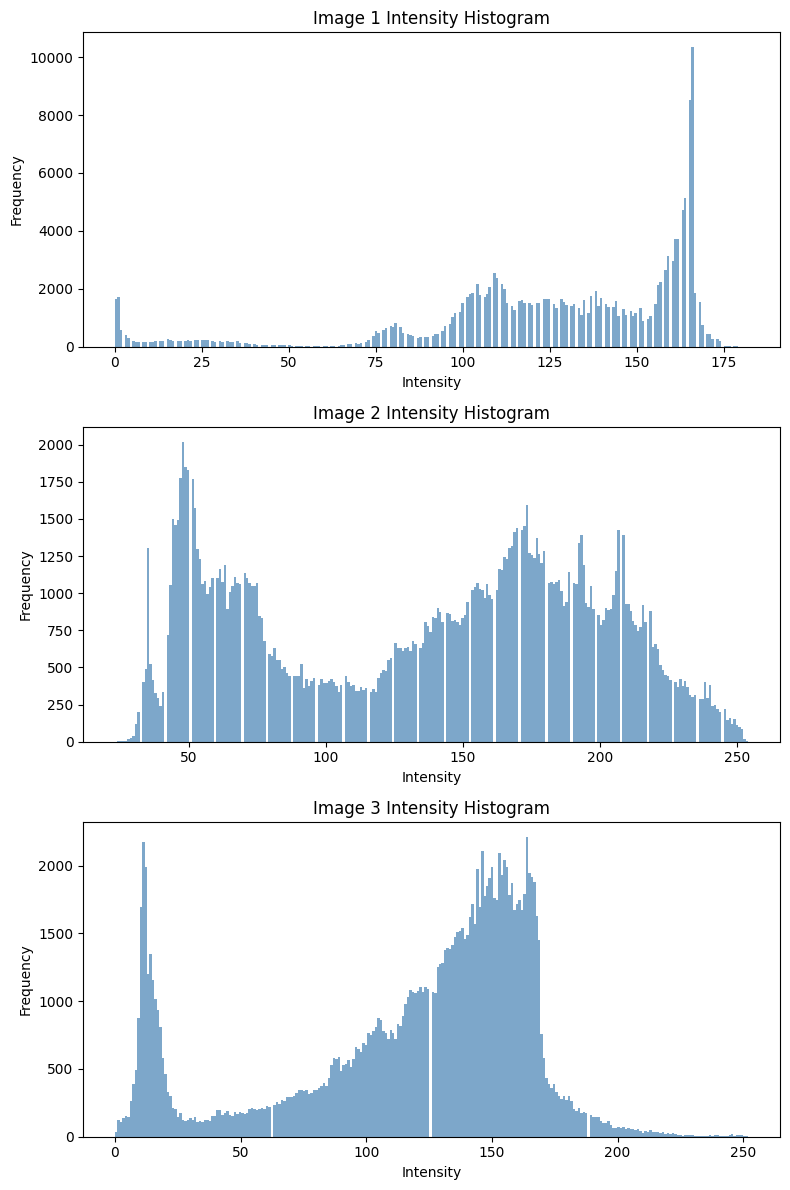

In [47]:
# Randomly choose 3 images to display
random.seed(432)
images = random.sample(os.listdir(dirs['Training images']),3)

# Create a subplot for the histograms
fig, axs = plt.subplots(3, 1, figsize=(8, 12))

# Iterate over the chosen images and plot their histograms
for i, image_file in enumerate(images):
    # Construct the full path to the image file
    image_path = os.path.join(dirs['Training images'], image_file)

    # Open the image using PIL
    image = Image.open(image_path)

    # Convert the image to grayscale
    image_gray = image.convert('L')

    # Convert the grayscale image to a NumPy array
    image_array = np.array(image_gray)

    # Flatten the image array
    image_flat = image_array.flatten()

    # Plot the histogram on the corresponding subplot
    axs[i].hist(image_flat, bins=256, color='steelblue', alpha=0.7)
    axs[i].set_xlabel('Intensity')
    axs[i].set_ylabel('Frequency')
    axs[i].set_title(f'Image {i+1} Intensity Histogram')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the subplots
plt.show()